Applying customer segmentation on historical data. We want to partition a customer base into groups of individuals that have similar characteristics, such as age, income and so on.

In [375]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans  
%matplotlib inline


In [376]:
df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv')
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [377]:
## drop address, because kmeans isnt applicable with catagorical variables
df1=df.drop('Address',axis=1)
print(df1.head(5))
##check if there's any missing value
print(df.isna().sum())
print(df.count())

   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted  DebtIncomeRatio  
0        0.0              6.3  
1        0.0             12.8  
2        1.0             20.9  
3        0.0              6.3  
4        0.0              7.2  
Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64
Customer Id        850
Age                850
Edu                850
Years Employed     850
Income             850

In [378]:
from sklearn.preprocessing import StandardScaler
# X = df1.values[:,1:]
# X = np.nan_to_num(X)##replace nan with 0 and inf with large finite numbers
X=df1.iloc[:,1:].fillna(0)
# print(X['Defaulted'].tolist())
Clus_dataSet = StandardScaler().fit_transform(X.values)
clus_dataSet=pd.DataFrame(Clus_dataSet,columns=['Age','Edu','Years Employed','Income','Card Debt','Other Debt','Defaulted','DebtIncomeRatio'])
clus_dataSet.head(5)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.523797,-0.576525
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,-0.523797,0.391387
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.909138,1.597554
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.523797,-0.576525
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.523797,-0.442507


In [379]:
##modeling
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, random_state=1,n_init = 12)
k_means.fit(clus_dataSet)
# labels = k_means.labels_
# print(labels)
pre=k_means.predict(clus_dataSet)
print(pre)

[2 1 0 2 1 1 2 2 2 1 0 2 2 2 0 2 2 2 1 2 2 2 0 1 1 2 2 2 2 2 2 1 0 2 2 2 0
 0 2 1 0 1 2 1 2 1 2 2 2 2 1 1 0 2 0 0 0 2 2 2 1 2 1 1 2 2 2 0 2 0 2 2 2 2
 2 2 2 2 1 2 2 0 1 2 1 2 2 2 0 0 2 2 0 0 2 2 2 2 0 2 0 1 2 0 0 1 2 2 2 2 2
 2 2 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 1 2 2 0
 2 2 2 1 0 2 2 2 2 1 0 0 2 1 2 2 2 2 2 2 2 2 1 2 2 0 2 0 2 2 0 1 0 2 2 1 0
 1 2 2 2 2 2 1 2 0 2 2 2 1 1 2 1 2 0 2 2 0 2 1 2 0 2 2 2 2 2 0 0 1 2 2 0 1
 2 2 2 2 1 2 2 0 2 2 2 2 1 2 2 0 1 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 1 0 2 0 2
 2 2 1 2 0 1 0 2 1 2 2 0 2 2 2 2 0 0 0 2 2 2 1 2 2 1 2 1 2 2 1 2 2 2 0 2 2
 0 2 0 1 2 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 2 0 2 0 1 2 0 2 2 2 0 0 2 2 2 1 0
 2 2 0 2 1 2 2 2 2 2 0 1 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 1 0 2 0 2 2 2 1 1 2
 0 2 1 0 0 2 2 2 0 2 2 2 2 2 1 2 1 2 2 2 2 0 2 0 2 2 2 1 2 2 2 2 0 2 2 0 0
 1 2 2 2 2 2 0 0 2 1 0 1 2 2 0 2 2 1 1 2 0 2 2 1 2 0 2 1 2 2 2 1 2 2 2 2 1
 2 0 2 2 2 2 1 0 2 2 1 2 0 2 2 1 2 1 2 2 2 2 2 2 2 1 1 2 2 1 2 0 2 2 2 0 2
 0 2 2 2 2 2 1 0 0 2 1 2 

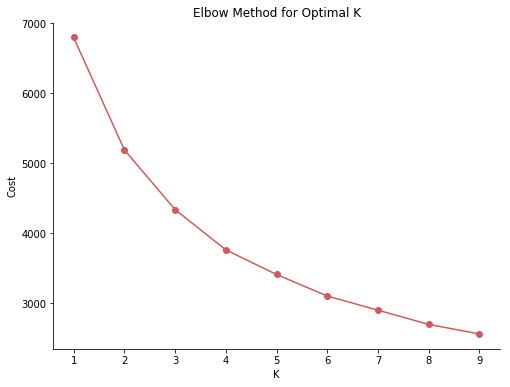

   k  silhouette
0  3    0.287387
1  4    0.254121
2  5    0.249648
3  6    0.244022
4  7    0.223430
5  8    0.212733
6  9    0.207427


In [380]:
###ML
## find optimal parameter
from sklearn.metrics import silhouette_score
inertia=[]
k_=np.arange(1,10)
score=[]
for k in k_:
    kmeans = KMeans(init = "k-means++", n_clusters = k, random_state=1,n_init = 12)
    model = kmeans.fit(clus_dataSet)
    inertia.append(model.inertia_)
    if k>2: #as shown in figure, the elbow points probably is at 3
        preds=model.predict(clus_dataSet)
        score.append(silhouette_score(clus_dataSet, preds, metric='euclidean',random_state=1))
    
## plot elbow
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(1,10),inertia, marker = "o",color='indianred')
plt.title('Elbow Method for Optimal K')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('K')
ax.set_ylabel('Cost')
plt.show()

##Silhouette
sil=pd.DataFrame(list(zip(k_[2:],score)), columns = ['k','silhouette'])
print(sil)

In [381]:
df1["Clus_km"] = pre #k=3
df1.head(5)
df1.groupby('Clus_km').mean()
# print(df1['Defaulted'].tolist())
df1=df1.fillna(0)
# print(df1['Defaulted'].tolist())

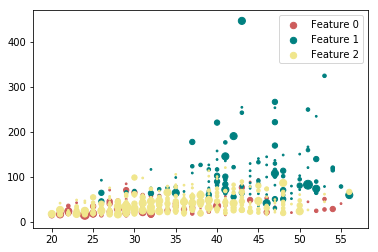

In [382]:
area = np.pi * ( X.iloc[:, 1])**2
co={0:'indianred',1:'teal',2:'khaki'}
for i in range(3):
    plt.scatter(df1['Age'][df1['Clus_km']==i], df1['Income'][df1['Clus_km']==i], s=area, c=co[i] , label="Feature {:g}".format(i))
plt.legend()
plt.show()




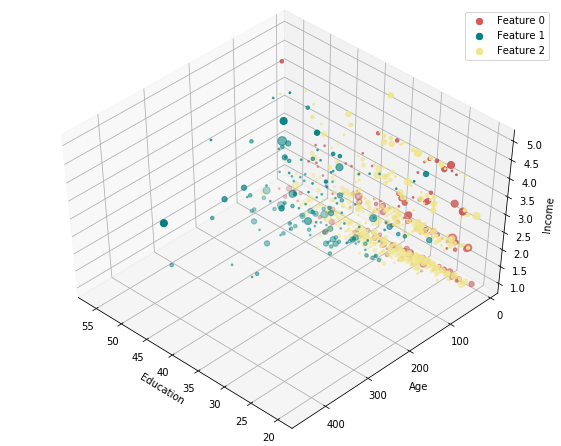

In [383]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
# plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
# plt.cla()
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')
for i in range(3):
    ax.scatter(df1['Age'][df1['Clus_km']==i], df1['Income'][df1['Clus_km']==i], df1['Edu'][df1['Clus_km']==i],s=area, c=co[i] , label="Feature {:g}".format(i))
plt.legend()
plt.show()

